In [1]:
import numpy as np
import os
import pandas as pd
# plotting specifications
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.cm import ScalarMappable
from cycler import cycler
mpl.rcParams.update({'font.size': 14})
plt.rcParams['axes.axisbelow'] = True
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
color_names = ['blue', 'red', 'green', 'black', 'magenta', 'y', 'slategray', 'darkorange']
mpl.rcParams['axes.prop_cycle'] = cycler(color=color_names)
pd.set_option('display.max_columns', None)
%matplotlib widget
from drl_grams import *

# N-gramas para control dinámico

## N = 13

In [4]:
n13_ga_loc_actions = uniformize_data('ga',**{'directory': 'resultados/n13stats_ga_lbv11/n13_stats_lbv11_1/', 'n':13})
n13_ga_acc_actions = uniformize_data('ga',**{'directory': 'resultados/n13stats_ga_acc/n13_stats_acc_1/', 'n':13})
n13_ga_oaps_actions_acc = uniformize_data('ga',**{'directory': 'resultados/one_action_per_site_zero/n13_stats_oaps0_0/', 'n':13})
n13_ga_oaps_actions_lb = uniformize_data('ga',**{'directory': 'resultados/one_action_per_site_zero_lb/n13_stats_oaps0_lb_0/', 'n':13})
n13_ga_oaps_extra_acc = uniformize_data('ga',**{'directory': 'resultados/one_per_site_extra_acc/n13_stats_oaps0_extra0/', 'n':13})

for i in [2,3,4,5]:
    n13_ga_loc_actions = np.vstack((n13_ga_loc_actions, uniformize_data('ga',**{'directory': f'resultados/n13stats_ga_lbv11/n13_stats_lbv11_{i}/', 'n':13})))
    n13_ga_acc_actions = np.vstack((n13_ga_acc_actions, uniformize_data('ga',**{'directory': f'resultados/n13stats_ga_acc/n13_stats_acc_{i}/', 'n':13})))
    
for i in [1,2,3,4,5,6,7,8,9]:
    n13_ga_oaps_actions_acc = np.vstack((n13_ga_oaps_actions_acc, uniformize_data('ga',**{'directory': f'resultados/one_action_per_site_zero/n13_stats_oaps0_{i}/', 'n':13})))
    n13_ga_oaps_actions_lb = np.vstack((n13_ga_oaps_actions_lb, uniformize_data('ga',**{'directory': f'resultados/one_action_per_site_zero_lb/n13_stats_oaps0_lb_{i}/', 'n':13})))
    n13_ga_oaps_extra_acc = np.vstack((n13_ga_oaps_extra_acc, uniformize_data('ga',**{'directory': f'resultados/one_per_site_extra_acc/n13_stats_oaps0_extra{i}/', 'n':13})))
    
n13_zhang_per_all = uniformize_data('zhang',**{'file': 'resultados/n13stats_per_16_acciones/experiment_0_n13_per_size120/success_action_sequences.dat'})
n13_zhang_per_best = uniformize_data('zhang',**{'file': 'resultados/n13stats_per_16_acciones/experiment_0_n13_per_size120/best_action_sequences.dat'})


for i in [1,2,3,4,5,6,7,8,9,10,11]:
    n13_zhang_per_all = np.vstack((n13_zhang_per_all, uniformize_data('zhang',**{'file' : f'resultados/n13stats_per_16_acciones/experiment_{i}_n13_per_size120/success_action_sequences.dat'})))
    n13_zhang_per_best = np.vstack((n13_zhang_per_best, uniformize_data('zhang',**{'file' : f'resultados/n13stats_per_16_acciones/experiment_{i}_n13_per_size120/best_action_sequences.dat'})))


In [5]:
action_arrays = [n13_ga_acc_actions,n13_ga_loc_actions,n13_zhang_per_all,n13_zhang_per_best,n13_ga_oaps_actions_acc,n13_ga_oaps_actions_lb,n13_ga_oaps_extra_acc]
titles = ['Genetic Algorithm, accumulative fitness', 'Genetic Algorithm, loc. based fitness', 'Fid > 90 (DRL PER)', 'Top 10 (DRL PER)' , 'OAPS, accumulative fitness', 'OAPS, loc. based fitness', 'OAPS, extra actions']

In [ ]:
for array, title in zip(action_arrays, titles):
    ngram(array, title, n=1)


In [ ]:
for array, title in zip(action_arrays, titles):
    ngram(array, title, n=2)


In [ ]:
for array, title in zip(action_arrays, titles):
    ngram(array, title, n=5)


In [ ]:
action_arrays_trimmed = [array[:, 25:] for array in action_arrays]
for array, array_trimmed, title in zip(action_arrays,action_arrays_trimmed, titles):
    ngram(array, title, n=3)
    ngram(array_trimmed, title + 'late', n=3)


In [ ]:
action_arrays_trimmed = [array[:, 25:] for array in action_arrays]
for array, array_trimmed, title in zip(action_arrays,action_arrays_trimmed, titles):
    ngram(array, title, n=3)
    ngram(array_trimmed, title + 'late', n=3)


In [ ]:
n13_oaps_acc_early = n13_ga_oaps_actions_acc[:, :35]
n13_oaps_acc_late = n13_ga_oaps_actions_acc[:, 30:] 
n13_oaps_lb_early = n13_ga_oaps_actions_lb[:, :35]
n13_oaps_lb_late = n13_ga_oaps_actions_lb[:, 30:]

ngram(n13_ga_oaps_actions_acc, 'One Action Per Site, Zero', n=1)
ngram(n13_ga_oaps_actions_lb, 'One Action Per Site, Zero LB', n=1)
ngram(n13_oaps_acc_early, 'One Action Per Site, Zero Early', n=1)
ngram(n13_oaps_lb_early, 'One Action Per Site, Zero LB Early', n=1) 
ngram(n13_oaps_acc_late, 'One Action Per Site, Zero Late', n=1)
ngram(n13_oaps_lb_late, 'One Action Per Site, Zero LB Late', n=1)
ngram(n13_ga_oaps_extra_acc, 'One Action Per Site, Extra', n=1)
ngram(n13_ga_oaps_extra_acc[:, 25:], 'One Action Per Site, Extra Late', n=1)
ngram(n13_ga_oaps_extra_acc[:, :35], 'One Action Per Site, Extra Early', n=1)

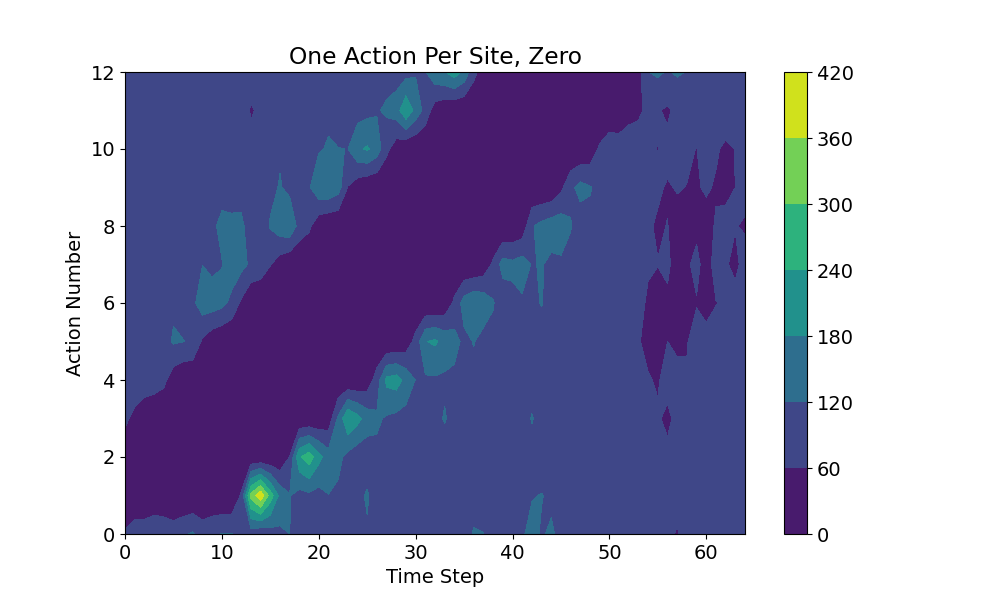

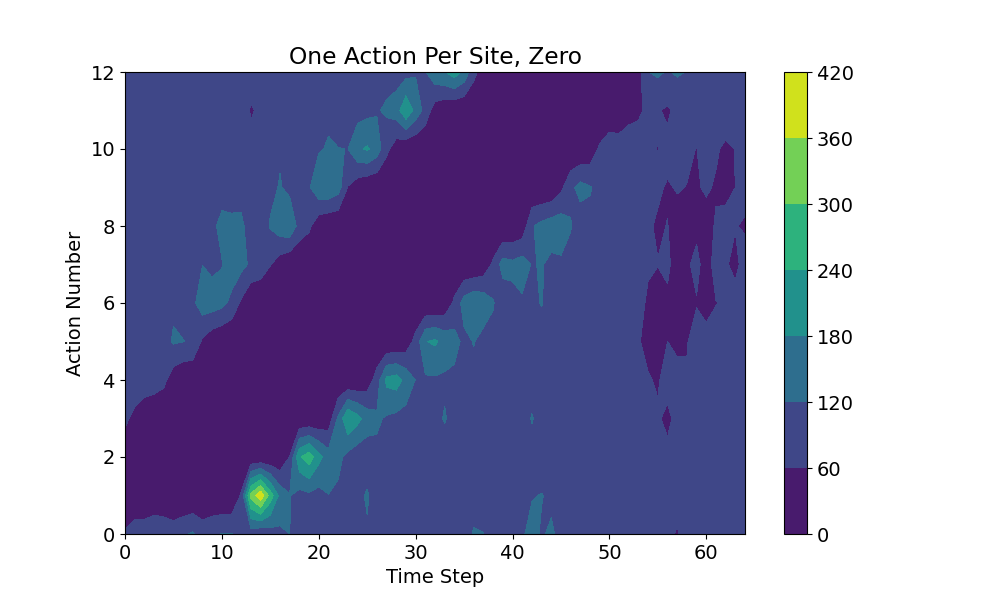

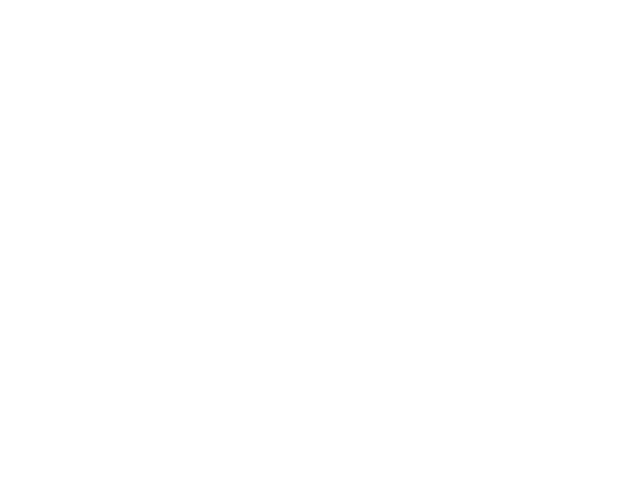

In [ ]:
plot_contour(n13_ga_oaps_actions_acc, 'One Action Per Site, Zero')
plt.show()

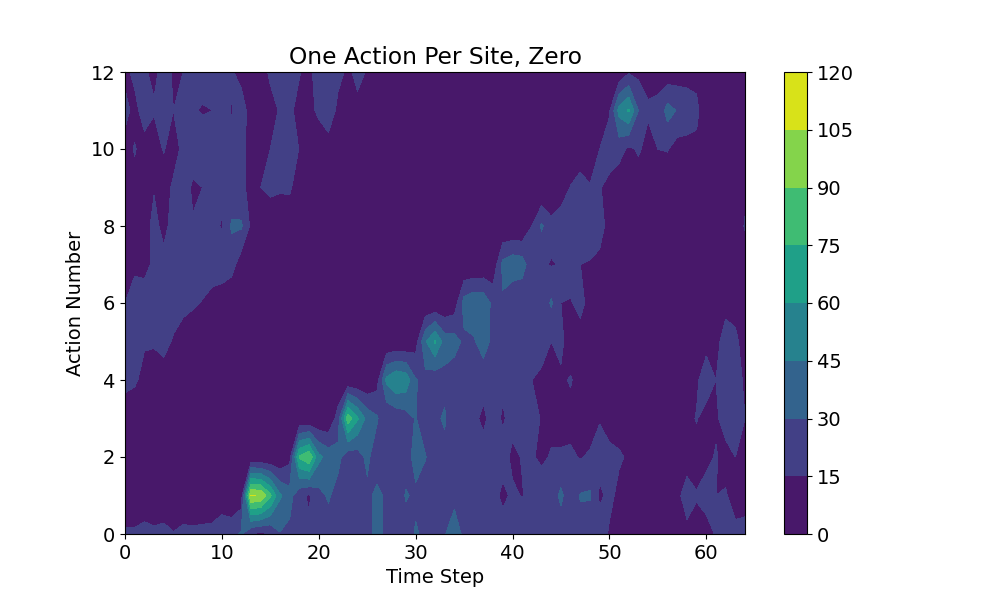

In [20]:

plot_contour(n13_ga_oaps_actions_lb, 'One Action Per Site, Zero')


In [21]:
plt.close('all')